# Einführung in Object Detection mit YOLO

In diesem Jupyter Notebook werden wir uns mit Techniken der Objekterkennung unter Verwendung des YOLO (You Only Look Once)-Frameworks beschäftigen. Zunächst werden wir die Grundlagen der Bildannotation erkunden und verstehen, wie annotierte Daten für das Training eines Objekterkennungsmodells vorbereitet werden. Anschließend werden wir die Struktur des Datasets detailliert betrachten, um sicherzustellen, dass es optimal für das Training konfiguriert ist. Wir werden auch demonstrativ einen eigenen Mini-Datensatz erstellen. Abschließend widmen wir uns dem Training eines YOLOv8-Modells.

## Austesten von Yolo

In [2]:
from ultralytics import YOLO

YOLOv8 bietet verschiedene Modellklassen, die für unterschiedliche Anwendungsfälle von maschinellem Lernen optimiert sind, darunter Klassifizierung (Image Classification), Erkennung (Object Detection) und Segmentierung (Object Segmentation). Jede dieser Klassen ist in verschiedenen Größen verfügbar, die von "Nano" bis "Huge" reichen, um unterschiedliche Anforderungen an Rechenleistung und Genauigkeit zu erfüllen. Hier eine detaillierte Erläuterung jeder Klasse:

Image Classification endet mit -cls.pt

Object Detection endet mit .pt

Object Segmentation endet mit -seg.pt

Diese Modellklassen ermöglichen es Nutzern, das für ihre spezifischen Bedürfnisse und Umgebungen passende Modell zu wählen, was YOLOv8 zu einem vielseitigen Tool in der Objekterkennung macht.

| Classification | Detection | Segmentation | Kind |
| -- | -- | -- | -- |
| yolov8n-cls.pt | yolov8n.pt | yolov8n-seg.pt | Nano |
| yolov8s-cls.pt | yolov8s.pt | yolov8s-seg.pt | Small |
| yolov8m-cls.pt | yolov8m.pt | yolov8m-seg.pt | Medium |
| yolov8l-cls.pt | yolov8l.pt | yolov8l-seg.pt | Large |
| yolov8x-cls.pt | yolov8x.pt | yolov8x-seg.pt | Huge |

Sie können für dieses Notebook verschiedene Modell austesten. Konzentrieren Sie sich aber für den Rest des Anwendungsfeldes auf das Nano Modell, damit dieses nicht viel Rechenleistung benötigt.

In [3]:
model = YOLO("yolov8m.pt")
print("Anzahl Klassen:", len(model.names))
print(model.names)

Anzahl Klassen: 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell 

Machen Sie eine vorhersage mit dem geladenen Modell. Dafür können Sie die predict() Methode nutzen.
Recherchieren Sie, was die predict Methode Ihnen zurückliefert. Analyisieren Sie die Rückgabe weiterhin selbst durch geeignete prints.
Experimentieren Sie mit der predict Methode. Was passiert wenn sie ein Array von mehreren Bildern übergeben. Gibt es noch weitere Dinge außer Bilder die der predict Methode übergeben werden können?

Lassen Sie sich z. B. ausgeben:
- Wie viele Bilder wurden verarbeitet
- Das Prediction Object
- Das Box Object
- Welche Klasse (Klassenname) wurde für eine Box predicted und mit welcher Konfidenz

In [4]:
prediction = model.predict("imgs/cat_dog.jpg")

print(f"Anzahl verarbeiteter Bilder: {len(prediction)}")

print(f"Prediction Object: {prediction}")

r = prediction[0]

print(f"Boxes Object: {r.boxes}")

for box in r.boxes:
    class_id = int(box.cls[0])
    conf = float(box.conf[0])
    xyxy = box.xyxy[0]  
    class_name = model.names[class_id]

    print(f"Gefundene Klasse: {class_name} (ID: {class_id})")
    print(f"Konfidenz: {conf:.2f}")
    print(f"Box Koordinaten: {xyxy.tolist()}")




image 1/1 c:\Users\lmarien\source\repos\KI iA\imgs\cat_dog.jpg: 448x640 1 cat, 1 dog, 345.6ms
Speed: 5.0ms preprocess, 345.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Anzahl verarbeiteter Bilder: 1
Prediction Object: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41

Implementieren sie die Funktion **get_detection_results**, die Predictions aus einem YOLO Objekterkennungsmodell verarbeitet. Die Predictions enthalten Informationen über erkannte Objekte in Form von umschließenden Boxen (Bounding Boxes), deren Klassenidentifikationen und Konfidenzwerte. Die Funktion soll diese Daten extrahieren und in einem standardisierten Format zurückgeben.

Die Vorhersagedaten (prediction) sind üblicherweise als Objekt organisiert, das mehrere Attribute enthält. Wichtig für diese Aufgabe sind:
- prediction.boxes: Eine Liste von Box-Objekten, wobei jedes Box-Objekt Details zu einer erkannten Entität enthält, einschließlich der Positionskoordinaten, der Klassen-ID (cls) und der Konfidenz (conf).
- prediction.names: Ein Verzeichnis oder Array, das die Zuordnung von numerischen IDs zu lesbaren Klassennamen enthält.

Die Funktion soll eine Liste von Objekten zurückgeben mit dem jeweiligen Inhalt:
- class_id: Der lesbare Name der Klasse, zu der das erkannte Objekt gehört.
- coords: Die Koordinaten der umschließenden Box, angepasst und gerundet auf ganze Zahlen.
- conf: Der Konfidenzwert der Erkennung, formatiert als Fließkommazahl mit zwei Dezimalstellen.
Also als Beispiel [{"class_id": ..., "coods": ..., "conf": ...}, {...}, {...}]

Schauen Sie sie zuerst genau die einzelnen Rückgabewerte von predict() an, um zu verstehen, wie diese sstrukturiert sind.


In [5]:
def get_detection_results(prediction):
    detection_results = []

    
    for box in prediction.boxes:
        class_idx = int(box.cls[0])  
        conf = float(box.conf[0])    
        coords = box.xyxy[0]         
        coords_list = [int(coord) for coord in coords.tolist()]
        class_name = prediction.names[class_idx]
        detection = {
            "class_id": class_name,
            "coords": coords_list,
            "conf": round(conf, 2)
        }

        detection_results.append(detection)

    return detection_results


detection_results = get_detection_results(prediction[0])
print("Ergebnisse:", detection_results)

Ergebnisse: [{'class_id': 'dog', 'coords': [261, 94, 460, 313], 'conf': 0.94}, {'class_id': 'cat', 'coords': [140, 169, 256, 315], 'conf': 0.91}]


Schreiben Sie die Funktion **draw_bounding_box()**. Die Funktion soll ein Bild entgegennehmen. Dann soll in der Funktion mit Yolo eine prediction durchgeführt werden und für jede erkannte Bounding Box diese in das Bild eingezeichnet werden. Für das einzeichnen soll die Library cv2 (OpenCV) verwendet werden. Hier gibt es Funktionen wie cv2.rectangle() und cv2.putText() die für das einzeichnen der Bounding Box helfen. Über der Bounding Box soll die Genauigkeit stehen, mit der das Objekt erkannt wurde.

OpenCV arbeitet im GBR statt RGB Format. Falls es Probleme bei der Anzeige der richtigen Farben gibt, kann die Funktion cv2.cvtColor(img, cv2.COLOR_BGR2RGB) helfen.

In [6]:
import cv2
from ultralytics import YOLO
model = YOLO("yolov8m.pt")


def draw_bounding_box(img):

    prediction = model.predict(img) 
    cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detection_results = get_detection_results(prediction[0])
    for detection in detection_results:
        class_name = detection["class_id"]
        conf = detection["conf"]
        coords = detection["coords"]

        # Box zeichnen
        cv2.rectangle(img, (coords[0], coords[1]), (coords[2], coords[3]), (0, 255, 0), 2)
        cv2.putText(img, f"{class_name} ({conf})", (coords[0], coords[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    return img

Durch die Funtion draw_bounding_box() können wir nun einfach ein Bild inkl. Bounding Boxen anzeigen zu lassen.


0: 448x640 1 cat, 1 dog, 339.2ms
Speed: 5.6ms preprocess, 339.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


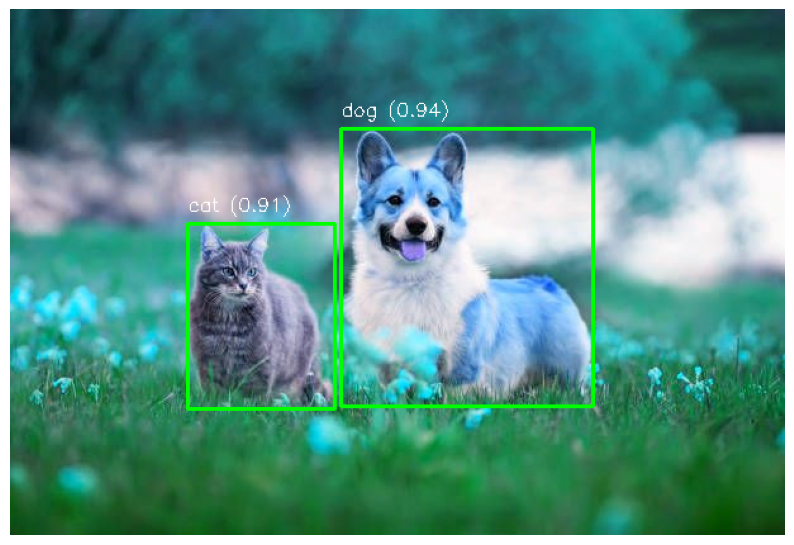

In [7]:
import matplotlib.pyplot as plt

def show_img_with_bounding_boxs(img_path: str):
    img = cv2.imread(img_path)
    img_ann = draw_bounding_box(img)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_ann)
    plt.axis("off")
    plt.show()


show_img_with_bounding_boxs("imgs/cat_dog.jpg")

Das gleiche lässt sich auf ein Video anwenden.

Schauen Sie sich die Funktion an und versuchen Sie zu verstehen, was die einzelnen Schritte tun. Erweitern Sie die Funktion um das einzeichnen der Bounding Boxes in jedes Frame des Videos. Dazu können sie die vorher implementierte Funktion draw_bounding_box() verwenden.

In [8]:
from tqdm import tqdm
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

def annotate_video(input_video, output_video, verbose = False):
    cap = cv2.VideoCapture(input_video)
    fps = cv2.CAP_PROP_FPS

    total_frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    pbar = tqdm(total=total_frame_num)
    frames = []

    while cap.isOpened():
        curr_frame_num = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    
        pbar.n = curr_frame_num
        pbar.refresh()

        ret, frame = cap.read()
        if not ret:
            break

        img_ann = draw_bounding_box(frame)
        frames.append(img_ann)
    cap.release()

    video = ImageSequenceClip(frames, fps)
    video.write_videofile(output_video)

Nun können wir die annotate_video() Funktion auf beliebige Videos anwenden.
Fügen Sie gerne ein eigenes Video (selbst aufgenommen oder heruntergeladen) hinzu und lassen sie dieses über Yolo anlaysieren. Achten Sie am besten darauf, dass die Videos nicht zu lange sind, damit die Bearbeitung nicht zu lange dauert und der Server nicht zu sehr beansprucht wird.

In [9]:
from IPython.display import Video

input_video = "videos\person-bicycle-car-detection.mp4"

Video(input_video)

In [10]:
output_video = f"{input_video[:-4]}-output.mp4"

annotate_video(input_video, output_video)

Video(output_video)

  0%|          | 0/41 [00:00<?, ?it/s]


0: 384x640 2 persons, 1 car, 274.6ms
Speed: 4.8ms preprocess, 274.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 1/41 [00:00<00:11,  3.34it/s]


0: 384x640 1 person, 1 car, 246.0ms
Speed: 3.1ms preprocess, 246.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


  5%|▍         | 2/41 [00:00<00:10,  3.60it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 243.1ms
Speed: 1.5ms preprocess, 243.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 3/41 [00:00<00:10,  3.71it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 248.1ms
Speed: 1.8ms preprocess, 248.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 10%|▉         | 4/41 [00:01<00:09,  3.76it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 251.0ms
Speed: 2.4ms preprocess, 251.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 5/41 [00:01<00:09,  3.77it/s]


0: 384x640 1 person, 1 car, 249.8ms
Speed: 1.6ms preprocess, 249.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 6/41 [00:01<00:09,  3.79it/s]


0: 384x640 2 persons, 1 car, 259.1ms
Speed: 3.0ms preprocess, 259.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 7/41 [00:01<00:08,  3.78it/s]


0: 384x640 2 persons, 1 car, 319.8ms
Speed: 2.1ms preprocess, 319.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 20%|█▉        | 8/41 [00:02<00:09,  3.67it/s]


0: 384x640 2 persons, 1 car, 256.1ms
Speed: 2.6ms preprocess, 256.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 9/41 [00:02<00:08,  3.68it/s]


0: 384x640 2 persons, 1 bicycle, 1 car, 248.3ms
Speed: 2.5ms preprocess, 248.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▍       | 10/41 [00:02<00:08,  3.70it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 267.4ms
Speed: 2.4ms preprocess, 267.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 11/41 [00:02<00:08,  3.69it/s]


0: 384x640 1 person, 1 car, 260.0ms
Speed: 2.4ms preprocess, 260.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▉       | 12/41 [00:03<00:07,  3.69it/s]


0: 384x640 2 persons, 1 car, 267.1ms
Speed: 2.5ms preprocess, 267.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 13/41 [00:03<00:07,  3.68it/s]


0: 384x640 3 persons, 1 bicycle, 1 car, 278.4ms
Speed: 2.7ms preprocess, 278.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 14/41 [00:03<00:07,  3.67it/s]


0: 384x640 1 person, 1 car, 255.6ms
Speed: 2.4ms preprocess, 255.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 15/41 [00:04<00:07,  3.68it/s]


0: 384x640 1 person, 1 car, 256.5ms
Speed: 2.7ms preprocess, 256.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▉      | 16/41 [00:04<00:06,  3.68it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 247.9ms
Speed: 2.1ms preprocess, 247.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


 41%|████▏     | 17/41 [00:04<00:06,  3.69it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 244.9ms
Speed: 2.1ms preprocess, 244.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▍     | 18/41 [00:04<00:06,  3.71it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 245.0ms
Speed: 2.6ms preprocess, 245.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▋     | 19/41 [00:05<00:05,  3.72it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 266.1ms
Speed: 2.1ms preprocess, 266.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 20/41 [00:05<00:05,  3.71it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 269.8ms
Speed: 2.4ms preprocess, 269.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████     | 21/41 [00:05<00:05,  3.70it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 253.1ms
Speed: 2.7ms preprocess, 253.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▎    | 22/41 [00:05<00:05,  3.71it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 254.4ms
Speed: 1.8ms preprocess, 254.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▌    | 23/41 [00:06<00:04,  3.71it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 248.2ms
Speed: 2.1ms preprocess, 248.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▊    | 24/41 [00:06<00:04,  3.72it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 255.2ms
Speed: 2.4ms preprocess, 255.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 25/41 [00:06<00:04,  3.72it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 257.2ms
Speed: 1.8ms preprocess, 257.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 26/41 [00:06<00:04,  3.72it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 249.0ms
Speed: 1.8ms preprocess, 249.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▌   | 27/41 [00:07<00:03,  3.73it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 250.8ms
Speed: 2.5ms preprocess, 250.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 28/41 [00:07<00:03,  3.73it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 243.8ms
Speed: 1.8ms preprocess, 243.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████   | 29/41 [00:07<00:03,  3.74it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 246.0ms
Speed: 2.3ms preprocess, 246.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 30/41 [00:08<00:02,  3.75it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 255.3ms
Speed: 2.1ms preprocess, 255.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▌  | 31/41 [00:08<00:02,  3.75it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 248.8ms
Speed: 1.8ms preprocess, 248.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 32/41 [00:08<00:02,  3.75it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 253.7ms
Speed: 1.9ms preprocess, 253.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 80%|████████  | 33/41 [00:08<00:02,  3.75it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 261.4ms
Speed: 2.4ms preprocess, 261.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 34/41 [00:09<00:01,  3.75it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 267.1ms
Speed: 1.5ms preprocess, 267.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▌ | 35/41 [00:09<00:01,  3.75it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 247.4ms
Speed: 2.8ms preprocess, 247.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 36/41 [00:09<00:01,  3.75it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 243.9ms
Speed: 1.6ms preprocess, 243.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 90%|█████████ | 37/41 [00:09<00:01,  3.76it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 254.8ms
Speed: 2.2ms preprocess, 254.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 38/41 [00:10<00:00,  3.76it/s]


0: 384x640 2 persons, 1 bicycle, 1 car, 257.2ms
Speed: 1.9ms preprocess, 257.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▌| 39/41 [00:10<00:00,  3.76it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 258.4ms
Speed: 1.7ms preprocess, 258.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 40/41 [00:10<00:00,  3.76it/s]


0: 384x640 2 persons, 1 bicycle, 1 car, 261.3ms
Speed: 2.7ms preprocess, 261.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


100%|██████████| 41/41 [00:10<00:00,  3.75it/s]

MoviePy - Building video videos\person-bicycle-car-detection-output.mp4.
MoviePy - Writing video videos\person-bicycle-car-detection-output.mp4



100%|██████████| 41/41 [00:11<00:00,  3.43it/s]

MoviePy - Done !
MoviePy - video ready videos\person-bicycle-car-detection-output.mp4


## Vorbereiten des Datensatzes

Um einen Bilddatensatz für YOLO v8 vorzubereiten, beginnt man mit der Sammlung der Bilder, die Objekte enthalten, die man erkennen möchte. Jedes Bild sollte dann annotiert werden, indem die Objekte mit Bounding-Boxen umgeben und entsprechend ihrer Kategorie beschriftet werden. Diese Annotationen werden in einem Format gespeichert, das von YOLO v8 akzeptiert wird, typischerweise als Textdateien, die für jedes Bild Koordinaten und Klassenidentifikatoren enthalten. Es ist wichtig, dass die Bilder und Annotationen in einer klaren Struktur organisiert sind, um beim Training des Modells korrekt geladen zu werden. Schließlich sollte der Datensatz in Trainings- und Validierungssets aufgeteilt werden, um sowohl das Training als auch die Bewertung der Modellleistung zu ermöglichen.

### Strukturieren des Datensatzes

Die Bilddaten sollten in einem spezifischen Format vorliegen, wobei jedes Bild mit einer entsprechenden Label-Datei gespeichert wird. Die Label-Dateien enthalten Koordinaten und Klassifikationen der Objekte. Die Struktur der Daten wird in einer YAML-Datei definiert, die die Pfade zu den Trainings- und Testdatensätzen, sowie wichtige Metadaten wie Klassenbezeichnungen enthält. Die YAML-Datei spielt eine zentrale Rolle, da sie YOLOv8 anweist, wo und wie es die relevanten Daten findet und interpretiert. Zusätzlich sollten die Daten in einem Verhältnis aufgeteilt werden, das ausreichendes Training ermöglicht und gleichzeitig genug Daten für das Testen zur Verfügung stellt, um die Modellleistung effektiv evaluieren zu können.

YOLO benötigt die Label in diesem Textformat:
```
<class_id> <x_center> <y_center> <width> <height>
```

<img src="https://user-images.githubusercontent.com/26833433/91506361-c7965000-e886-11ea-8291-c72b98c25eec.jpg" alt="Bounding Box Format" width="600"/>

Jedes Bild hat somit eine eindeutig zugeordnete Label (.txt) Datei. In dieser Datei steht pro Zeile eine Bounding Box (Normalisiert) inkl. Klassen-ID drin.

### Image Annotation

Man könnte jetzt jede Textdatei einzeln anlegen. Jedoch ist die eh schon sehr mühselige Arbeit damit noch mehr erschwert. Glücklicherweise gibt es viele Tools um die Arbeit etwas zu erleichtern.

--> Recherchieren Sie nach Tools zur Annotation von Bilddaten. Das Tool sollte bestenfalls ein Export für das YOLO Format haben.

Wähle Sie ein geeignetes Tool für sich aus. Falls Sie kein geeignetes Tool gefunden haben können Sie [ImgLab](https://solothought.com/imglab) benutzen. Dies ist ein sehr triviales Tool ohne viele Zusatzfunktionen, reicht aber für unser Anwendungsfall aus.

Ihnen liegt ein Datensatz **guitar_imgs** vor, in dem 10 Trainings und 6 Testdaten sind. Sie sollen eine KI antrainieren, die Gitarren erkennt. Schauen Sie sich diesen Datensatz an und notieren Sie sich Kritiken an diesem Datensatz. Recherchieren Sie dazu, was Kriterien für einen guten Bilddatensatz sind.

--> Annotieren Sie den Datensatz mit dem vorher ausgewähltem Tool. Fallen ihnen während dem Annotieren weitere Kriterien ein, über die zu diskutieren sind? Notieren Sie, was ihre Kriterien für die Annotation waren.

-Gitarre ist schwierig mit rectanglen einzufangen
-Variation ist warscheinlich das wichtigste bei den Datensätzen
-unterschiedliche Bildgrößen
-helligkeit
-mehrere Objekte übereinander


### Training

Nun trainieren wir ein YOLO Modell auf unsere neue Klasse **guitar** (die in dem vortrainierten Modellen nicht vorhanden ist).
Dabei wollen wir den Trainingsprozess fürs erste nur einmal grob durchspielen. Da wir nur 10 Trainingsbilder haben, können wir keine wirklich Funktionierende KI erwarten. Somit ist die Anzahl der Epoche auch klein gehalten, weil auch bei einer hohen Anzahl von Epochen kein gutes Ergebnis zu erwaten ist, bei dieser geringen Anzahl von Bildern.

In [ ]:
data = "data.yaml"
EPOCHS = 10

model = YOLO("yolov8n.yaml")

results = model.train(data=data, epochs=EPOCHS)

Ultralytics 8.3.119  Python-3.11.9 torch-2.7.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, f

train: Scanning C:\Users\lmarien\source\repos\KI iA\train\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.10.0 ms, read: 1747.40.0 MB/s, size: 11085.4 KB)



c:\Users\lmarien\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\lmarien\source\repos\KI iA\valid\labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 58.93it/s]

val: New cache created: C:\Users\lmarien\source\repos\KI iA\valid\labels.cache



c:\Users\lmarien\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train8
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


c:\Users\lmarien\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
       1/10         0G      3.474      4.547      4.298         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          1          1    0.00412          1    0.00682    0.00127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.653      4.602      4.392         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all          1          1    0.00408          1     0.0079    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.324      4.672      4.282         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all          1          1    0.00422          1    0.00634    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.344      4.612      4.518         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all          1          1    0.00415          1     0.0199    0.00252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.545      4.504      4.246         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all          1          1    0.00422          1     0.0063    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.044      4.288      4.362         13        640: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all          1          1    0.00426          1     0.0199    0.00254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.551      4.579      4.352         14        640: 100%|██████████| 1/1 [00:02<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all          1          1    0.00426          1    0.00614    0.00115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      3.474       4.54      4.263         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all          1          1    0.00427          1     0.0203    0.00258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]